In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time

In [2]:
n = 100
X = np.linspace(0, 1, n)
Y = np.linspace(0, 1, n)
X0, Y0 = np.meshgrid(X, Y)

In [3]:
plate_length = 1
h = plate_length/n
h_2 = h**2

def ff(x,y):
    return 2*np.pi**2*np.sin(np.pi*X0[x, y])*np.sin(np.pi*Y0[x, y])

In [4]:
A = np.zeros((n*n,n*n))
B = np.zeros((n*n,1))

In [5]:
A.shape, B.shape

((10000, 10000), (10000, 1))

In [6]:
B

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [7]:
a = list(range(100))
b = list(range(100))
c = list(range(0,10000, 100))
d = list(range(0,10000, 100))
e = list(range(99, 10000, 100))
f = list(range(99, 10000, 100))
g = list(range(9900, 10000))
h = list(range(9900, 10000))

In [8]:
for i, j in enumerate(range(0, 10000)):
    if (i-n)>0 and (i+n)<(n*n) and not any(j in lst for lst in (a,b,c,d,e,f,g,h)):
        A[i,j-n] = 1
        A[i,j-1] = 1
        A[i,j] = -4
        A[i,j+1] = 1
        A[i,j+n] = 1

In [9]:
#boundary condition
for i,j in zip(a,b):
    A[i,j] = 1
for i,j in zip(c,d):
    A[i,j] = 1
for i,j in zip(e,f):
    A[i,j] = 1
for i,j in zip(g,h):
    A[i,j] = 1

In [10]:
A=-(1/h_2)*A

In [11]:
#np.set_printoptions(threshold=np.inf)
A[101,:]

array([    -0., -10000.,     -0., ...,     -0.,     -0.,     -0.])

In [12]:
for i in range(0, 10000):
    if not any(i in lst for lst in (a,b,c,d,e,f,g,h)):
        x = int(i/n)
        y = int(i%100)
        B[i,0] = ff(x,y)

In [13]:
#Matrix calculation using inverse
start1 = time.time()
x = np.linalg.inv(A)@B
end1 = time.time()
print(f'CPU time = {end1-start1}')

CPU time = 103.90458345413208


In [14]:
x_reshaped = x.reshape(100, 100)
x_reshaped

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00098671, 0.00197243, ..., 0.00197243, 0.00098671,
        0.        ],
       [0.        , 0.00197243, 0.00394287, ..., 0.00394287, 0.00197243,
        0.        ],
       ...,
       [0.        , 0.00197243, 0.00394287, ..., 0.00394287, 0.00197243,
        0.        ],
       [0.        , 0.00098671, 0.00197243, ..., 0.00197243, 0.00098671,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

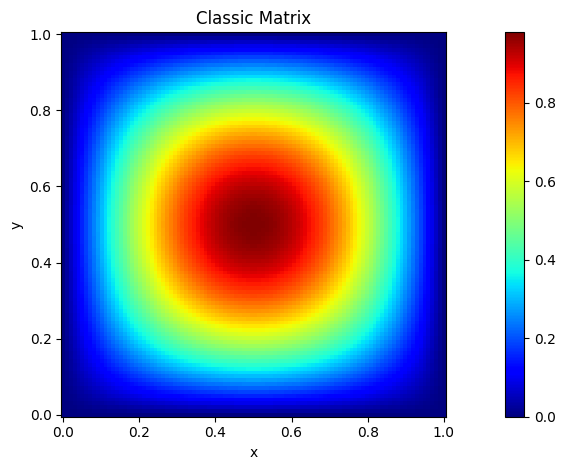

In [15]:
plt.plot()
plt.pcolormesh(X0, Y0, x_reshaped, cmap="jet")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Classic Matrix")
plt.tight_layout()
plt.axis("square")
plt.show()

In [16]:
start2 = time.time()
U, D, VT = np.linalg.svd(A, full_matrices=True)
end2 = time.time()
print(f'CPU time = {end2-start2}')

CPU time = 1005.025315284729


In [17]:
start3 = time.time()
x2 = np.linalg.inv(VT)@np.linalg.inv(np.diag(D))@np.linalg.inv(U)@B
end3 = time.time()
print(f'CPU time = {end3-start3}')

CPU time = 414.2417104244232


In [18]:
x_reshaped2 = x2.reshape(100, 100)
x_reshaped2

array([[ 0.00000000e+00,  1.86358603e-14,  3.33427596e-15, ...,
        -8.21171882e-15, -1.79066255e-14, -4.40738158e-17],
       [ 2.07868288e-14,  9.86711994e-04,  1.97243045e-03, ...,
         1.97243045e-03,  9.86711994e-04, -1.64228990e-14],
       [-8.87992315e-16,  1.97243045e-03,  3.94287483e-03, ...,
         3.94287483e-03,  1.97243045e-03,  1.29247232e-14],
       ...,
       [-2.20245325e-15,  1.97243045e-03,  3.94287483e-03, ...,
         3.94287483e-03,  1.97243045e-03, -2.14830795e-16],
       [ 4.29432091e-15,  9.86711994e-04,  1.97243045e-03, ...,
         1.97243045e-03,  9.86711994e-04, -1.63275744e-15],
       [ 1.33708601e-28,  3.40986018e-16,  2.18506438e-15, ...,
         9.07433194e-16, -4.42492093e-15,  0.00000000e+00]])

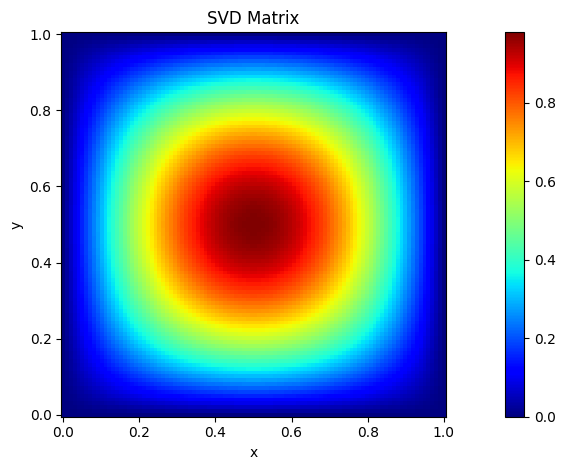

In [20]:
plt.plot()
plt.pcolormesh(X0, Y0, x_reshaped2, cmap="jet")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"SVD Matrix")
plt.tight_layout()
plt.axis("square")
plt.show()

In [21]:
n = 100
X = np.linspace(0, 1, n)
Y = np.linspace(0, 1, n)
X0_real, Y0_real = np.meshgrid(X, Y)
u_real = np.zeros([n, n])
u_real[:, :] = np.sin(np.pi*X0_real[:, :]) * np.sin(np.pi*Y0_real[:, :])

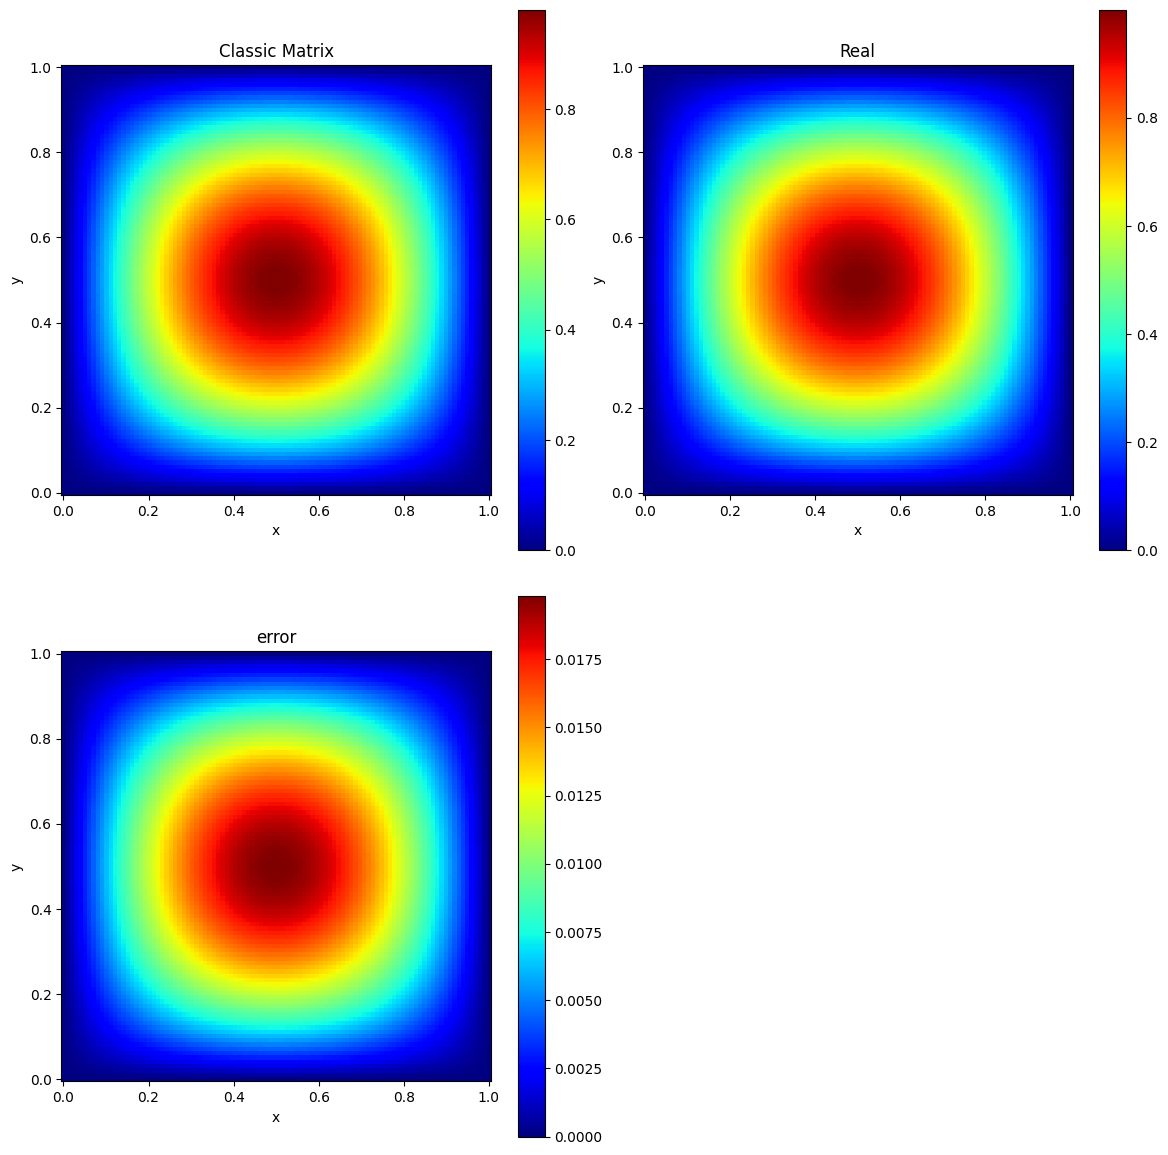

In [23]:
plt.figure("", figsize=(12, 12))

plt.subplot(221)
plt.pcolormesh(X0, Y0, x_reshaped, cmap="jet")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Classic Matrix")
plt.tight_layout()
plt.axis("square")

plt.subplot(222)
plt.pcolormesh(X0, Y0, u_real, cmap="jet")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Real")
plt.tight_layout()
plt.axis("square")

error = np.zeros([n, n])
error[:, :] = abs(u_real[:, :] - x_reshaped[:, :])


plt.subplot(223)
plt.pcolormesh(X0, Y0, error, cmap="jet")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"error")
plt.tight_layout()
plt.axis("square")
plt.show()

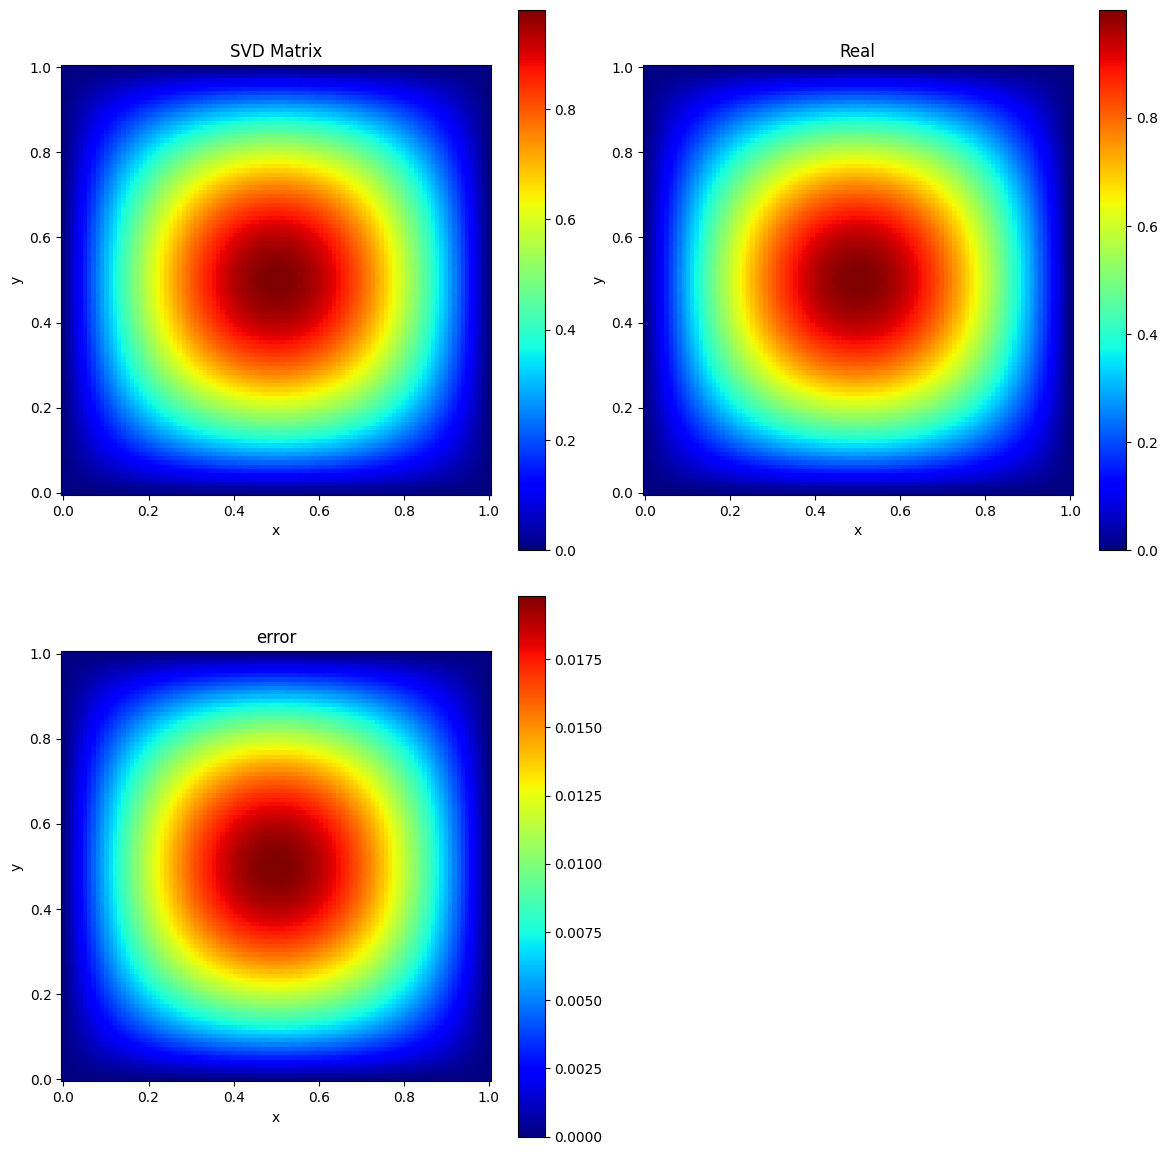

In [25]:
plt.figure("", figsize=(12, 12))

plt.subplot(221)
plt.pcolormesh(X0, Y0, x_reshaped2, cmap="jet")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"SVD Matrix")
plt.tight_layout()
plt.axis("square")

plt.subplot(222)
plt.pcolormesh(X0, Y0, u_real, cmap="jet")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Real")
plt.tight_layout()
plt.axis("square")

error = np.zeros([n, n])
error[:, :] = abs(u_real[:, :] - x_reshaped2[:, :])


plt.subplot(223)
plt.pcolormesh(X0, Y0, error, cmap="jet")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"error")
plt.tight_layout()
plt.axis("square")
plt.show()